**Exploratory Data Analysis (EDA) on Retail Sales Data**

**Data**

The dataset contains 70,391 sales records across retail and warehouse channels.

Large-scale transactional data enables trend and product-level analysis.

In [ ]:
data = pd.read_csv('/content/Warehouse_and_Retail_Sales.csv', low_memory=False)

**Data Cleaning**

Missing sales values were replaced with zero and duplicates were removed.


In [ ]:
import pandas as pd

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70391 entries, 0 to 70390
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              70391 non-null  int64  
 1   MONTH             70391 non-null  int64  
 2   SUPPLIER          70346 non-null  object 
 3   ITEM CODE         70391 non-null  object 
 4   ITEM DESCRIPTION  70391 non-null  object 
 5   ITEM TYPE         70391 non-null  object 
 6   RETAIL SALES      70389 non-null  float64
 7   RETAIL TRANSFERS  70390 non-null  float64
 8   WAREHOUSE SALES   70390 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 4.8+ MB
None


In [ ]:
print(data.isnull().sum())

YEAR                 0
MONTH                0
SUPPLIER            45
ITEM CODE            0
ITEM DESCRIPTION     0
ITEM TYPE            0
RETAIL SALES         2
RETAIL TRANSFERS     1
WAREHOUSE SALES      1
dtype: int64


In [ ]:
print(data.drop_duplicates(inplace=True))

None


**Descriptive Statistics**

Warehouse sales show higher variability than retail sales.

Sales distribution is highly skewed with few high-volume transactions.

In [ ]:
data['RETAIL SALES'] = data['RETAIL SALES'].fillna(0)
data['WAREHOUSE SALES'] = data['WAREHOUSE SALES'].fillna(0)
data['RETAIL TRANSFERS'] = data['RETAIL TRANSFERS'].fillna(0)

In [ ]:
print(data.describe())

                YEAR          MONTH   RETAIL SALES  RETAIL TRANSFERS  \
count  212289.000000  212289.000000  212286.000000     212288.000000   
mean     2018.184776       5.831291       6.892299          6.789523   
std         1.220920       3.752796      29.979399         29.474137   
min      2017.000000       1.000000      -6.490000        -38.490000   
25%      2017.000000       2.000000       0.000000          0.000000   
50%      2018.000000       6.000000       0.320000          0.000000   
75%      2019.000000       9.000000       3.380000          3.000000   
max      2020.000000      12.000000    2739.000000       1990.830000   

       WAREHOUSE SALES  
count    212288.000000  
mean         24.298672  
std         242.128489  
min       -4996.000000  
25%           0.000000  
50%           1.000000  
75%           5.000000  
max       18317.000000  


In [ ]:
cols = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']
mean_values = data[cols].mean()
print("Mean:\n", mean_values)

Mean:
 RETAIL SALES         6.892299
RETAIL TRANSFERS     6.789523
WAREHOUSE SALES     24.298672
dtype: float64


In [ ]:
cols = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']
median_values = data[cols].median()
print("\nMedian:\n", median_values)


Median:
 RETAIL SALES        0.32
RETAIL TRANSFERS    0.00
WAREHOUSE SALES     1.00
dtype: float64


In [ ]:
cols = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']
mode_values = data[cols].mode().iloc[0]
print("\nMode:\n", mode_values)


Mode:
 RETAIL SALES        0.0
RETAIL TRANSFERS    0.0
WAREHOUSE SALES     0.0
Name: 0, dtype: float64


In [ ]:
cols = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']
std_values = data[cols].std()
print("\nStandard Deviation:\n", std_values)


Standard Deviation:
 RETAIL SALES         29.979399
RETAIL TRANSFERS     29.474137
WAREHOUSE SALES     242.128489
dtype: float64


Median sales are close to zero across channels.

Most products have low sales, while few dominate revenue.

Warehouse demand fluctuates more than retail demand.

Visuals(Graphs)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data['DATE'] = pd.to_datetime(data['YEAR'].astype(str) + '-' + data['MONTH'].astype(str))

In [ ]:
data.groupby('ITEM DESCRIPTION')['RETAIL SALES'] \
    .sum() \
    .sort_values(ascending=False) \
    .head(10)


,RETAIL SALES
ITEM DESCRIPTION,
TITO'S HANDMADE VODKA - 1.75L,17084.14
CORONA EXTRA LOOSE NR - 12OZ,16573.00
HEINEKEN LOOSE NR - 12OZ,11366.00
MILLER LITE 30PK CAN - 12OZ,9186.00
BOWMAN'S VODKA - 1.75L,8422.53
BUD LIGHT 30PK CAN,7730.00
CORONA EXTRA 4/6 NR - 12OZ,7463.82
MILLER LITE HIGH GRAPHIC LOOSE NR - 12OZ,7351.77
STELLA ARTOIS LOOSE NR - 11.2OZ,6671.00


In [10]:
!pip install plotly
import pandas as pd
import plotly.express as px

data = pd.read_csv('Warehouse_and_Retail_Sales.csv', low_memory=False)

data['DATE'] = pd.to_datetime(data['YEAR'].astype(str) + '-' + data['MONTH'].astype(str))
sales_trend = data.groupby('DATE')['RETAIL SALES'].sum().reset_index()

item_type_sales = data.groupby('ITEM TYPE')['RETAIL SALES'].sum().reset_index()

top_items = data.groupby('ITEM DESCRIPTION')['RETAIL SALES'].sum().reset_index() \
                .sort_values(by='RETAIL SALES', ascending=False).head(10)

comparison = data[['RETAIL SALES','WAREHOUSE SALES']].sum().reset_index()
comparison.columns = ['Type', 'Total Sales']

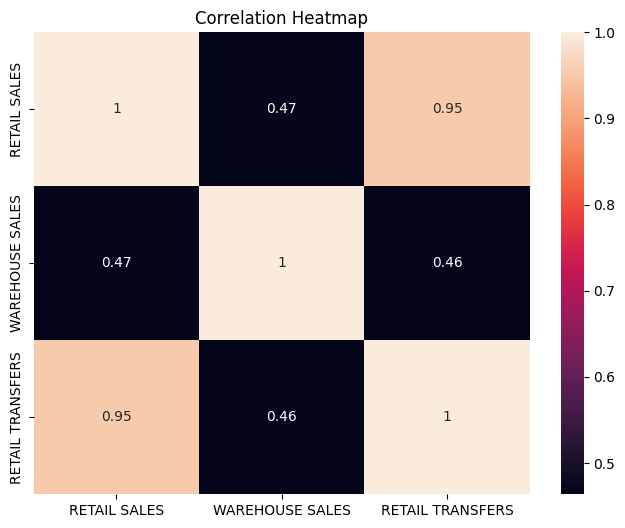

In [13]:
fig1 = px.line(sales_trend, x='DATE', y='RETAIL SALES',
               title='Retail Sales Trend Over Time')
fig1.show()

fig2 = px.bar(item_type_sales, x='ITEM TYPE', y='RETAIL SALES',
              title='Retail Sales by Item Type')
fig2.show()

fig4 = px.bar(comparison, x='Type', y='Total Sales',
              title='Retail vs Warehouse Sales')
fig4.show()

plt.figure(figsize=(8,6))
sns.heatmap(data[['RETAIL SALES','WAREHOUSE SALES','RETAIL TRANSFERS']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()



*  Time-Series Analysis: Retail sales fluctuate over time, indicating seasonal demand patterns.
*   Item Type Analysis: Sales contribution varies significantly across different item types.

*   Top Products: A small number of products account for the majority of total sale
*   Retail vs Warehouse Comparison: Warehouse sales exceed retail sales in overall volume.


*   Correlation Heatmap: Retail and warehouse sales show a positive correlation.



